In [1]:
%matplotlib inline
from ecell4 import *
from ecell4_base.core import *

In [2]:
def func(reactants, products, volume, t, rc, pc):
    k = 1.0
    retval = k * volume
    for num in reactants:
        retval *= num / volume
    return retval

In [3]:
sp1, sp2, sp3 = Species("A"), Species("B"), Species("C")
rr1 = create_unbinding_reaction_rule(sp1, sp2, sp3, 1.0)

In [4]:
desc = ReactionRuleDescriptorPyfunc(func, "MA")

desc.set_reactant_coefficients([1])
desc.set_product_coefficients([1, 1])

rr2 = create_unbinding_reaction_rule(sp1, sp2, sp3, 1.0)
rr2.set_descriptor(desc)

In [5]:
m1 = NetworkModel()
m1.add_reaction_rule(rr1)

m2 = NetworkModel()
m2.add_reaction_rule(rr2)

In [6]:
obs1 = run_simulation(10.0, model=m1, y0={"A": 60}, return_type="observer")
obs2 = run_simulation(range(11), model=m2, y0={"A": 60}, return_type="observer")

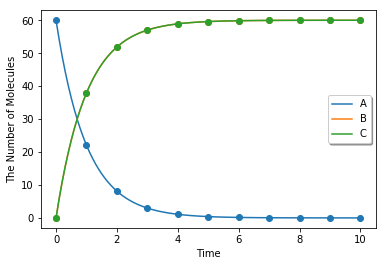

In [7]:
viz.plot_number_observer(obs1, "-", obs2, "o")